# ** Project 9: Support Vector Machines (SVMs)**

Tiffany Akwarandu

## **Handwritten Digit Recognition with SVM**

*Imagine you are a data scientist at a startup building smart postal sorting machines.*  
Your team is developing an AI system that can automatically **read and sort handwritten postal codes** on mail envelopes captured by a camera.

You're responsible for building the **core digit recognition engine** that can accurately identify handwritten numbers (0–9) from grayscale image scans. These digits are critical for correctly determining ZIP codes and ensuring timely delivery of packages across the country.

You’ve been given access to a large dataset of handwritten digits collected from past mail samples — this is the **MNIST dataset**, a benchmark for handwritten digit recognition.

---

## **Your Task**

In this assignment, you will implement **Support Vector Machines (SVM)**, a powerful and versatile supervised machine learning algorithm used for classification and regression tasks. You will also explore the nuances of **hyperparameter tuning** (such as kernel type, `C`, and `gamma`) to optimize model performance.

Specifically, you will:

- Preprocess and normalize the MNIST dataset.
- Train an SVM classifier to recognize digits from 0 to 9.
- Evaluate its performance on unseen test data.
- Experiment with different kernels (e.g., linear, RBF) and hyperparameter settings.
- Visualize misclassified digits and analyze model behavior.

---

### **Import Libraries**

* Review each library imported below and let it help you understand what you will be utilizing from scikit-learn and other libraries. Take the time to review official documentation to familiarize yourself with the modules that you are not familiar with.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

## **PART 1: Implementation of SVM Classifier on the MNIST dataset**

## **Q1: Load and Preprocess the Dataset**

In this exercise, you will use the MNIST dataset, a collection of 70,000 grayscale images of handwritten digits (0–9), each of size 28×28 pixels.

Your task is to:
- Load the dataset using TensorFlow datasets. The import statement for this has been provided for you. You will load the dataset from Tensorflow, just like you load data from sklearn datasets, with a method and the name of the dataset as in `mnist.load_data()`
- Normalize the pixel values to the range [0, 1].
- Flatten each image into a vector of length 784 (since 28 × 28 = 784).

This preprocessing step prepares the data for use with classifiers like Support Vector Machines, which expect input features as 1D vectors.

After loading and preprocessing:
- Print the shape of the training and test sets to confirm the dimensions.
- Print the first training sample to see what the input to your classifier looks like.


In [ ]:
from tensorflow.keras.datasets import mnist

def load_data_from_tf():
    """
    Load and preprocess the MNIST dataset for use with machine learning classifiers.

    Returns:
        tuple: A tuple containing:
            - X_train (numpy.ndarray): Flattened and normalized training images.
            - y_train (numpy.ndarray): Training labels.
            - X_test (numpy.ndarray): Flattened and normalized test images.
            - y_test (numpy.ndarray): Test labels.
    """

    # Load data (already split into train/test)
    (X_train, y_train), (X_test, y_test) = mnist.load_data()


    # Normalize to [0, 1]
    # Here you will convert pixel values (originally in range [0, 255]) to the range [0, 1],
    # which is a common preprocessing step for ML models to improve convergence and performance.
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0

    # Flatten images in tet and train datasets to prepare it for the SVM model we will implement. (from 28x28 to 784)
    X_train = X_train.reshape(-1, 28 * 28)
    X_test = X_test.reshape(-1, 28 * 28)

    # return what the docstring specifies.
    return X_train, y_train, X_test, y_test



In [ ]:
# Load the dataset by calling the function you implemented above
X_train, y_train, X_test, y_test = load_data_from_tf()



# Print the shape of the data
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)


Training data shape: (60000, 784)
Training labels shape: (60000,)
Test data shape: (10000, 784)
Test labels shape: (10000,)


In [ ]:
# Print a random training point.
random_index = np.random.randint(0, X_train.shape[0])

print("Random training sample index:", random_index)
print("Label:", y_train[random_index])
print("Flattened image:", X_train[random_index])


Random training sample index: 15822
Label: 4
Flattened image: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.      

## **Q2: Exploratory Data Analysis (EDA)**

Before training your model, it's important to understand the structure and characteristics of the data. In this section, you'll perform several exploratory tasks to gain insight into the MNIST dataset.

### **Q2.1: Class Distribution**

Explore the distribution of digit classes in the training dataset.

- How many samples are there for each digit (0–9)?
- Is the dataset balanced?

Knowing if your dataset is imbalanced can help you choose the right evaluation metrics and model tuning techniques.

Tasks:
- Count the number of training samples per class.
- Plot a bar chart to visualize the distribution.



In [ ]:
# Count how many examples we have of each digit (0 to 9)
unique_classes, counts = np.unique(y_train, return_counts=True)


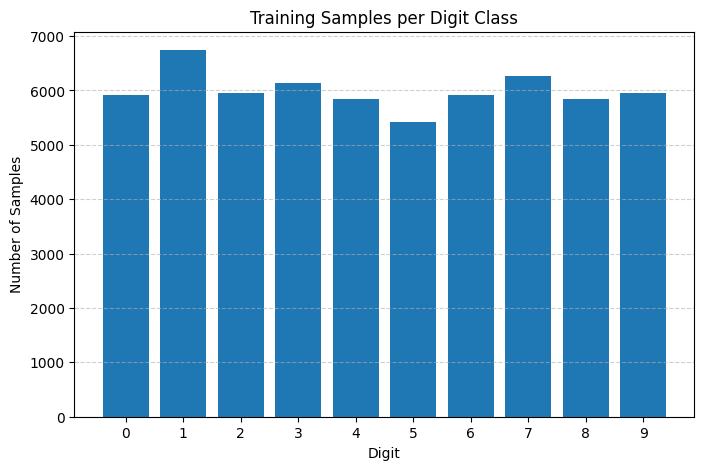

In [ ]:
# Plot the distribution

plt.figure(figsize=(8, 5))
plt.bar(unique_classes, counts)
plt.xlabel('Digit')
plt.ylabel('Number of Samples')
plt.title('Training Samples per Digit Class')
plt.xticks(unique_classes)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### **Q2.2: Visualizing Handwritten Digits**

It's important to understand what the input to your classifier looks like.

Looking at real examples can help you debug preprocessing steps, understand data variation, and build intuition about what makes digits similar or different.

Tasks:
- Write or use a helper function to visualize the first few images in the training set.
- Display 10 example digits with their corresponding labels.

Tip: Each image is 28×28 pixels and stored as a flattened array of length 784. You’ll need to reshape it for visualization.

In [ ]:
def visualize_digits(X_digits, y_digits, num_images=10):
    """
    Visualizes the first few images and their labels from the MNIST dataset.

    Args:
        X_digits (numpy.ndarray): Flattened 28x28 images.
        y_digits (numpy.ndarray): Corresponding labels.
        num_images (int): Number of images to visualize.
    """
    rows = 2
    cols = (num_images + 1) // 2
    plt.figure(figsize=(1.5 * cols, 3))

    for i in range(num_images):
        plt.subplot(rows, cols, i + 1)
        image = X_digits[i].reshape(28, 28)
        plt.imshow(image, cmap='gray')
        plt.title(f"Label: {y_digits[i]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Complete this function

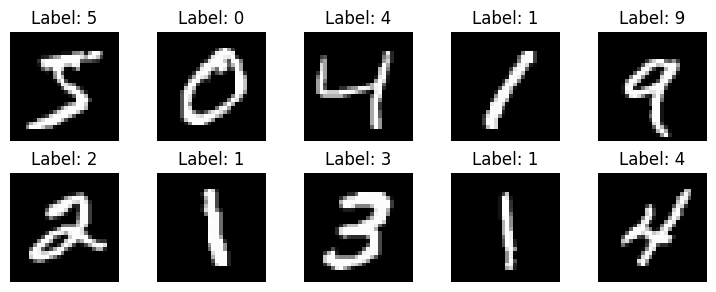

In [ ]:
# Call the function `visualize_digits` to visualize the first 10 digits
visualize_digits(X_train, y_train)



### **Q2.3: Pixel Intensity Statistics**

Each pixel in the MNIST images is a grayscale value between 0 and 1 . Understanding pixel value distributions can help you debug normalization issues and gain insights into the dataset's contrast and sparsity.

Tasks:
- Compute the **mean**, **median**, and **standard deviation** of the pixel values in the training set.
- Based on these stats, are most pixels dark (close to 0) or bright (close to 1)?

In [ ]:
# Calculate and print basic statistics of pixel intensity
mean_intensity = X_train.mean()
median_intensity = np.median(X_train)
std_intensity = X_train.std()

print(f"Mean pixel value: {mean_intensity:.4f}")
print(f"Median pixel value: {median_intensity:.4f}")
print(f"Standard deviation of pixel values: {std_intensity:.4f}")

Mean pixel value: 0.1307
Median pixel value: 0.0000
Standard deviation of pixel values: 0.3081


## **Q3: Implementing a Multi-Class Linear SVM from Scratch**

In this section, you will build a **multi-class Support Vector Machine (SVM)** classifier **from scratch**, using **Stochastic Gradient Descent (SGD)** and a **one-vs-rest (OvR)** strategy.

SVM is originally designed for binary classification. To handle all 10 digits in MNIST, we will train **10 binary classifiers** — one for each digit. Each classifier will distinguish between one digit (e.g., 7) and all other digits (not 7).

Then, at prediction time, you will apply all 10 classifiers to a test example and choose the one with the **highest score**.

### **Q3.1: Train a Binary Linear SVM Classifier**

Implement a function that trains a **binary linear SVM** using stochastic gradient descent. Use the **hinge loss gradient** update rule.

Your function should:
- Accept training data `X` and labels `y`
- Initialize weights `w` and bias `b`
- Convert all labels to -1 or +1
- Iterate through the data and apply the gradient update
- Return the learned weight vector `w` and bias `b`

#### Step 1: Compute the condition

$$
\text{condition} = y_i \cdot (w^T x_i + b) \geq 1
$$

---

#### Step 2: Apply the update rule

If the condition is satisfied:

$$
w \leftarrow w - \eta \cdot 2\lambda w
$$

If the condition is **not** satisfied:

$$
w \leftarrow w - \eta \cdot (2\lambda w - y_i x_i)
$$

$$
b \leftarrow b - \eta \cdot y_i
$$

---

Where:

- $ \eta $ is the **learning rate**
- $ \lambda $ is the **regularization strength**
- $ w $ is the weight vector
- $ b $ is the bias term
- $ y_i \in \{-1, +1\} $

In [ ]:
def sgd_svm_train(X, y, learning_rate=0.001, lambda_param=0.01, epochs=1000):
    """
    Trains a binary linear SVM using stochastic gradient descent.

    Args:
        X (np.ndarray): Input data of shape (n_samples, n_features)
        y (np.ndarray): Labels (-1 or +1)
        learning_rate (float): Learning rate for SGD
        lambda_param (float): Regularization strength
        epochs (int): Number of passes through the training data

    Returns:
        w (np.ndarray): Learned weight vector
        b (float): Learned bias
    """
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0

    for epoch in range(epochs):
        indices = np.random.permutation(n_samples)
        for idx in indices:
            xi = X[idx]
            yi = y[idx]
            condition = yi * (np.dot(w, xi) + b) >= 1

            if condition:
                w -= learning_rate * (2 * lambda_param * w)
            else:
                w -= learning_rate * (2 * lambda_param * w - yi * xi)
                b -= learning_rate * yi
            #Write your code here

    return w, b

### **Q3.2: Train a One-vs-Rest Multi-Class SVM**

Now implement a wrapper function to train **one SVM per class (0 through 9)**.

Each classifier will:
- Treat one digit as **positive (+1)**
- Treat all other digits as **negative (-1)**
- Call your function from Q3.1 to train the binary classifier

The function should return:
- A list of 10 weight vectors (one for each class)
- A list of 10 bias values (one for each class)

In [ ]:
def train_ovr_svm(X, y, num_classes=10, learning_rate=0.001, lambda_param=0.01, epochs=1000):
    """
    Trains one-vs-rest SVM classifiers for multi-class classification.

    Args:
        X (np.ndarray): Training data
        y (np.ndarray): Digit labels (0 to 9)
        num_classes (int): Number of classes (default: 10)
        learning_rate (float): Learning rate for SGD
        lambda_param (float): Regularization strength
        epochs (int): Number of training epochs

    Returns:
        weights (list of np.ndarray): List of weight vectors, one per class
        biases (list of float): List of bias values, one per class
    """
    weights = []
    biases = []

    for digit in range(num_classes):
        #write your code here


        # convert labels: +1 for current digit, -1 for others
        y_binary = np.where(y == digit, 1, -1)

        # train binary classifier
        w, b = sgd_svm_train(X, y_binary, learning_rate, lambda_param, epochs)

        weights.append(w)
        biases.append(b)

    return weights, biases

### **Q3.3: Predict with the Multi-Class Classifier**

Implement a prediction function that uses the trained one-vs-rest classifiers to make predictions.

For each input sample:
- Compute the decision score for each class (i.e., dot product + bias)
- Select the class with the **highest score**

Return a vector of predicted class labels.

In [ ]:
def decision_function(X, w, b):
    """
    Computes decision scores: w^T x + b
    """
    #write your code here
    return np.dot(X, w) + b

def predict_ovr(X, weights, biases):
    """
    Predicts class labels using one-vs-rest classifiers.

    Args:
        X (np.ndarray): Input data
        weights (list of np.ndarray): List of learned weight vectors
        biases (list of float): List of learned biases

    Returns:
        np.ndarray: Predicted class labels
    """

    #write your code here
    scores = np.array([decision_function(X, w, b) for w, b in zip(weights, biases)])  # shape: (10, n_samples)

    predictions = np.argmax(scores.T, axis=1)

    return predictions

### **Q3.4: Evaluate Your Classifier**

Evaluate the performance of your model using **accuracy**.

To keep training time reasonable, use a **subset** of the MNIST dataset:
- e.g., train on the first 10,000 training samples
- evaluate on the first 2,000 test samples

You may also optionally:
- Print a confusion matrix
- Try the full dataset (if your code runs fast enough)

Use `sklearn.metrics.accuracy_score()` for evaluation.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Use a smaller subset to keep training fast
X_train_subset = X_train[:2000]
y_train_subset = y_train[:2000]
X_test_subset = X_test[:500]
y_test_subset = y_test[:500]

# Train the OvR SVM
weights, biases = train_ovr_svm(X_train_subset, y_train_subset, epochs=100)

# Predict
y_pred = predict_ovr(X_test_subset, weights, biases)


# Accuracy
accuracy = accuracy_score(y_test_subset, y_pred)
print(f"Accuracy on test subset: {accuracy:.4f}")

Accuracy on test subset: 0.7560


## **Q4: Hyperparameter Tuning with GridSearchCV**

In this section, you will use **`GridSearchCV`** to automatically search for the best hyperparameters for a Support Vector Machine (SVM) classifier on the MNIST dataset.

Instead of manually trying different combinations of `C`, `gamma`, and `kernel`, you’ll let `GridSearchCV` handle the search and evaluation using cross-validation.


* We will use `GridSearchCV` to find the **best model** by performing **hyperparameter tuning**.

---

1. Define a parameter grid with combinations of `C`, `gamma`, and `kernel`.
2. Use `GridSearchCV` to train and select the best model from that grid.
3. Fit the model on the training data.
4. Return:
   - The **best estimator** (`best_estimator_`)
   - The test data (`X_test`, `y_test`) for future evaluation

- Hint: Use a **smaller subset of the MNIST data** (e.g., 2,000 training and 500 test samples) to make tuning run faster.


In [ ]:
def tune_svm(X_train, y_train, X_test, y_test):
    """
    Performs hyperparameter tuning for the SVM model using GridSearchCV.

    Args:
        X_train (numpy.ndarray): Training features.
        y_train (numpy.ndarray): Training labels.
        X_test (numpy.ndarray): Test features.
        y_test (numpy.ndarray): Test labels.

    Returns:
        tuple: A tuple containing:
            - best_estimator_ (SVC): The best model found by GridSearchCV.
            - X_test (numpy.ndarray): The test set features.
            - y_test (numpy.ndarray): The test set targets.
    """
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': [0.001, 0.0001],
        'kernel': ['rbf', 'poly', 'linear']
    }

    svc = SVC()
    grid = GridSearchCV(svc, param_grid, cv=3, verbose=1, n_jobs=-1)
    grid.fit(X_train, y_train)

    print("Best parameters found:")
    print(grid.best_params_)

    return grid.best_estimator_, X_test, y_test

In [ ]:
# Use a smaller subset of the data
X_train_small = X_train[:2000]
y_train_small = y_train[:2000]
X_test_small = X_test[:500]
y_test_small = y_test[:500]

# Run grid search on the smaller subset. Call `tune_svm()`
best_model, X_eval, y_eval = tune_svm(X_train_small, y_train_small, X_test_small, y_test_small)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters found:
{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


## **Q5: Evaluate the Best Model**

Now that you have selected the best model using `GridSearchCV`, it's time to **evaluate its performance** on the test set.

You will implement a function called `evaluate_model()` to do the following:

---

### **Your Task**

- Use the trained `SVC` model to predict labels on the test set.
- Generate a **confusion matrix** and plot it using `seaborn.heatmap()`.
- Print out a **classification report** showing:
  - Precision
  - Recall
  - F1-score

In [ ]:
def evaluate_model(model, X_test, y_test):
    """
    Predicts using the model and evaluates the performance on the test set.
    Implements a confusion_matrix plot using seaborn.
    Prints the precision, recall, and F1 scores using classification_report().

    Args:
        model (SVC): The trained SVM model.
        X_test (numpy.ndarray): The test set features.
        y_test (numpy.ndarray): The test set targets.
    """
    # Predict labels
    predictions = model.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, predictions)

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()



    # Print precision, recall, F1-score
    print("Classification Report:")
    print(classification_report(y_test, predictions))

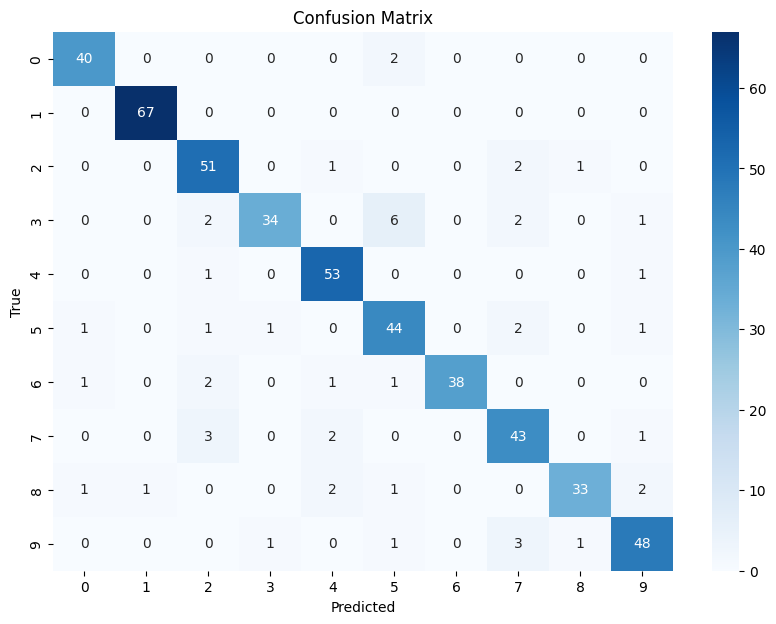

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        42
           1       0.99      1.00      0.99        67
           2       0.85      0.93      0.89        55
           3       0.94      0.76      0.84        45
           4       0.90      0.96      0.93        55
           5       0.80      0.88      0.84        50
           6       1.00      0.88      0.94        43
           7       0.83      0.88      0.85        49
           8       0.94      0.82      0.88        40
           9       0.89      0.89      0.89        54

    accuracy                           0.90       500
   macro avg       0.91      0.90      0.90       500
weighted avg       0.91      0.90      0.90       500



In [ ]:
evaluate_model(best_model, X_eval, y_eval)